In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('/Users/akshitsanoria/Desktop/retail/data/raw.xlsx')
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [3]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
print(missing_values_count)

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [4]:
df.shape

(525461, 8)

# Data Cleaning - Handling Missing Values

In [5]:
df = df.dropna(subset=['Customer ID'])

In [6]:
df.shape

(417534, 8)

In [7]:
has_negative = (df['Price'] < 0).any()
print(f"Are there negative prices? {has_negative}")

Are there negative prices? False


In [8]:
has_negative = (df['Quantity'] <= 0).any()
print(f"Are there negative Quantity? {has_negative}")

Are there negative Quantity? True


In [9]:
df = df[df['Quantity'] > 0]

In [10]:
df.shape

(407695, 8)

In [11]:

df['Description'] = df['Description'].fillna('Unknown')




print(df.isnull().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [12]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


In [14]:
# Separate date and time into different columns
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time

print("Date and Time columns created successfully!")
print("\nFirst few rows:")
print(df[['InvoiceDate', 'Date', 'Time']].head())

Date and Time columns created successfully!

First few rows:
          InvoiceDate        Date      Time
0 2009-12-01 07:45:00  2009-12-01  07:45:00
1 2009-12-01 07:45:00  2009-12-01  07:45:00
2 2009-12-01 07:45:00  2009-12-01  07:45:00
3 2009-12-01 07:45:00  2009-12-01  07:45:00
4 2009-12-01 07:45:00  2009-12-01  07:45:00


In [15]:
df = df.drop(columns=['InvoiceDate'])

In [23]:
df['Price'] = df['Price'].astype(float).round(2)

In [24]:
df.head(4)

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Date,Time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01,07:45:00


# Distribution Analysis

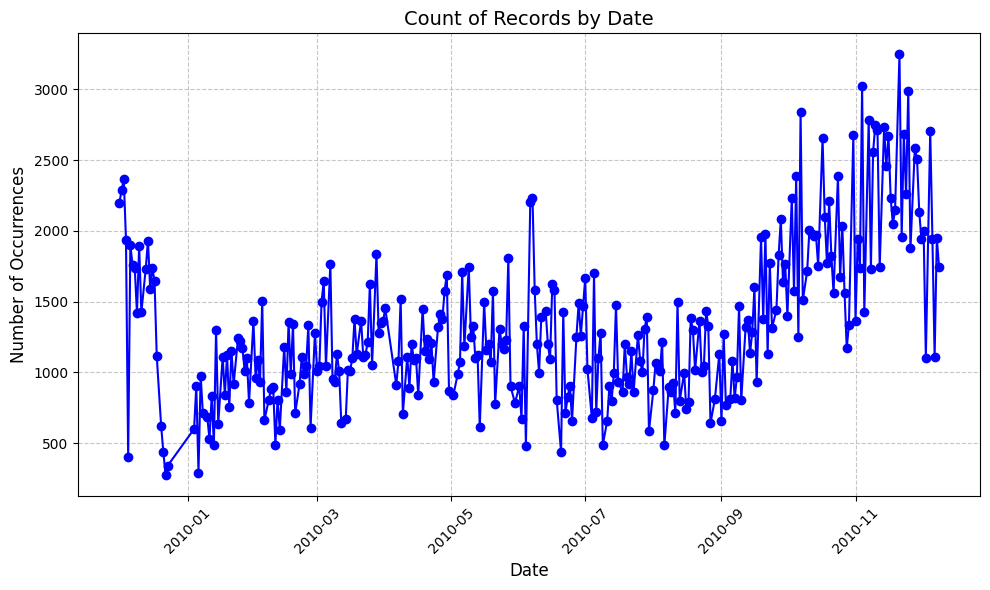

In [16]:
date_counts = df['Date'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
date_counts.plot(kind='line', marker='o', color='b', linestyle='-')

# Adding labels and title
plt.title('Count of Records by Date', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate dates for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show/Save the plot
plt.savefig('date_trends.png')
plt.show()

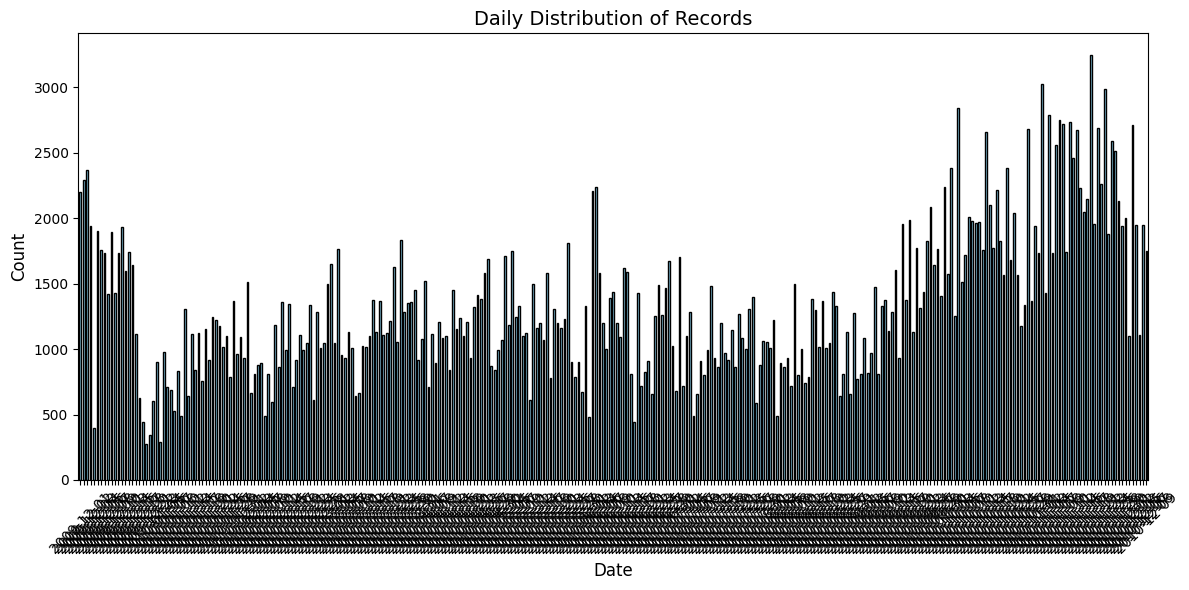

In [42]:
plt.figure(figsize=(12, 6))
date_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Daily Distribution of Records', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('date_bars.png')
plt.show()

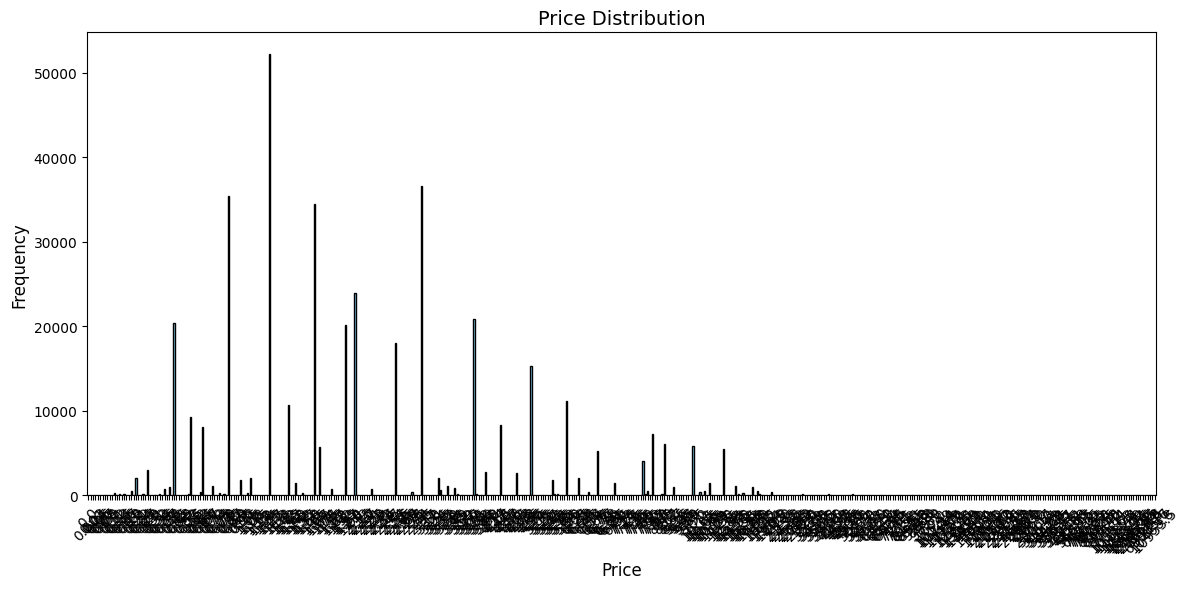

In [18]:
price_counts = df['Price'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Price Distribution', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# plt.savefig('date_bars.png')
plt.show()

In [25]:
df["Price"].max()

np.float64(10953.5)

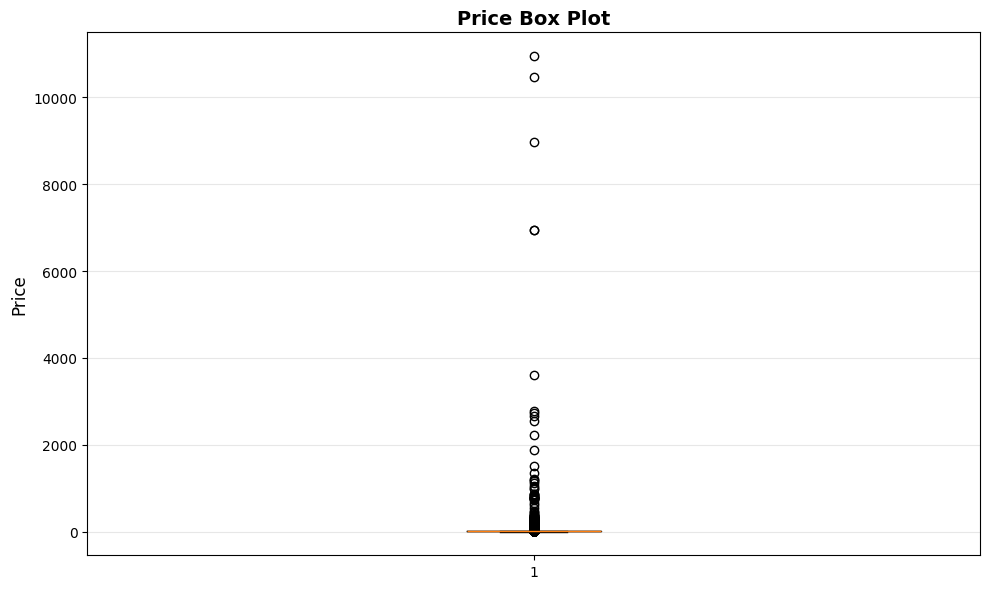

Price Statistics:
Min: $0.00
Q1: $1.25
Median: $1.95
Q3: $3.75
Max: $10953.50
IQR: $2.50


In [26]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Price'], vert=True)
plt.title('Price Box Plot', fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Price Statistics:")
print(f"Min: ${df['Price'].min():.2f}")
print(f"Q1: ${df['Price'].quantile(0.25):.2f}")
print(f"Median: ${df['Price'].median():.2f}")
print(f"Q3: ${df['Price'].quantile(0.75):.2f}")
print(f"Max: ${df['Price'].max():.2f}")
print(f"IQR: ${df['Price'].quantile(0.75) - df['Price'].quantile(0.25):.2f}")

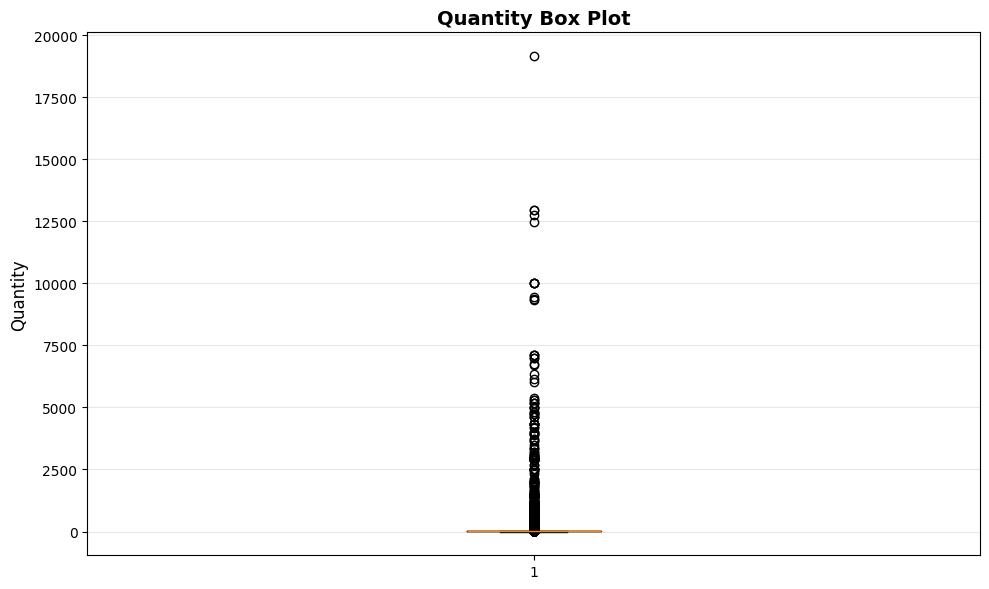

Quantity Statistics:
Min: 1.00
Q1: 2.00
Median: 5.00
Q3: 12.00
Max: 19152.00
IQR: 10.00


In [27]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Quantity'], vert=True)
plt.title('Quantity Box Plot', fontsize=14, fontweight='bold')
plt.ylabel('Quantity', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Quantity Statistics:")
print(f"Min: {df['Quantity'].min():.2f}")
print(f"Q1: {df['Quantity'].quantile(0.25):.2f}")
print(f"Median: {df['Quantity'].median():.2f}")
print(f"Q3: {df['Quantity'].quantile(0.75):.2f}")
print(f"Max: {df['Quantity'].max():.2f}")
print(f"IQR: {df['Quantity'].quantile(0.75) - df['Quantity'].quantile(0.25):.2f}")

In [28]:
adj_df = df
Q1 = adj_df['Price'].quantile(0.25)
Q3 = adj_df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = adj_df[(adj_df['Price'] < lower_bound) | (adj_df['Price'] > upper_bound)]
non_outliers = adj_df[(adj_df['Price'] >= lower_bound) & (adj_df['Price'] <= upper_bound)]

print(f"Total records: {len(adj_df)}")
print(f"Outlier records: {len(outliers)} ({len(outliers)/len(adj_df)*100:.1f}%)")
print(f"Non-outlier records: {len(non_outliers)} ({len(non_outliers)/len(adj_df)*100:.1f}%)")
print(f"\nOutlier bounds: ${lower_bound:.2f} - ${upper_bound:.2f}")
print(f"\nOutlier prices range: ${outliers['Price'].min():.2f} - ${outliers['Price'].max():.2f}")
print(f"Outlier revenue contribution: ${outliers['Price'].sum():.2f} out of ${adj_df['Price'].sum():.2f} ({outliers['Price'].sum()/adj_df['Price'].sum()*100:.1f}%)")

Total records: 407695
Outlier records: 32989 (8.1%)
Non-outlier records: 374706 (91.9%)

Outlier bounds: $-2.50 - $7.50

Outlier prices range: $7.65 - $10953.50
Outlier revenue contribution: $487515.68 out of $1343023.77 (36.3%)


In [29]:
Q1q = adj_df['Quantity'].quantile(0.25)
Q3q = adj_df['Quantity'].quantile(0.75)
IQRq = Q3q - Q1q

lower_boundq = Q1q - 1.5 * IQRq
upper_boundq = Q3q + 1.5 * IQRq

outliersq = adj_df[(adj_df['Quantity'] < lower_boundq) | (adj_df['Quantity'] > upper_boundq)]
non_outliersq = adj_df[(adj_df['Quantity'] >= lower_boundq) & (adj_df['Quantity'] <= upper_boundq)]

print(f"Total records: {len(adj_df)}")
print(f"Outlier records: {len(outliersq)} ({len(outliersq)/len(adj_df)*100:.1f}%)")
print(f"Non-outlier records: {len(non_outliersq)} ({len(non_outliersq)/len(adj_df)*100:.1f}%)")
print(f"\nOutlier Quantity: {lower_boundq:.2f} - {upper_boundq:.2f}")
print(f"\nOutlier Quantity range: {outliersq['Quantity'].min():.2f} - {outliersq['Quantity'].max():.2f}")
print(f"Outlier revenue contribution: {outliersq['Quantity'].sum():.2f} out of {adj_df['Quantity'].sum():.2f} ({outliersq['Quantity'].sum()/adj_df['Quantity'].sum()*100:.1f}%)")

Total records: 407695
Outlier records: 26338 (6.5%)
Non-outlier records: 381357 (93.5%)

Outlier Quantity: -13.00 - 27.00

Outlier Quantity range: 28.00 - 19152.00
Outlier revenue contribution: 2967375.00 out of 5539224.00 (53.6%)


In [30]:
df["Quantity"].min()

np.int64(1)

In [31]:
# Create segments based on price outliers
core_segment = non_outliers.copy()
premium_segment = outliers.copy()

print("="*60)
print("SEGMENT COMPARISON ANALYSIS")
print("="*60)

print("\n--- CORE SEGMENT (Standard Products) ---")
print(f"Orders: {len(core_segment):,}")
print(f"Avg Price: ${core_segment['Price'].mean():.2f}")
print(f"Avg Quantity: {core_segment['Quantity'].mean():.2f} units")
print(f"Total Revenue: ${core_segment['Price'].sum():,.2f}")
print(f"Total Quantity: {core_segment['Quantity'].sum():,.0f} units")
print(f"Revenue per Order: ${core_segment['Price'].mean():.2f}")

print("\n--- PREMIUM SEGMENT (High-Value Products) ---")
print(f"Orders: {len(premium_segment):,}")
print(f"Avg Price: ${premium_segment['Price'].mean():.2f}")
print(f"Avg Quantity: {premium_segment['Quantity'].mean():.2f} units")
print(f"Total Revenue: ${premium_segment['Price'].sum():,.2f}")
print(f"Total Quantity: {premium_segment['Quantity'].sum():,.0f} units")
print(f"Revenue per Order: ${premium_segment['Price'].mean():.2f}")

print("\n--- TOP COUNTRIES IN EACH SEGMENT ---")
print("\nCore Segment Top 5:")
print(core_segment['Country'].value_counts().head())
print("\nPremium Segment Top 5:")
print(premium_segment['Country'].value_counts().head())

# Analyze overlap between price and quantity outliers
print("\n" + "="*60)
print("PRICE vs QUANTITY OUTLIER OVERLAP")
print("="*60)

price_outlier_mask = (adj_df['Price'] >= upper_bound) | (adj_df['Price'] < lower_bound)
qty_outlier_mask = (adj_df['Quantity'] >= upper_boundq) | (adj_df['Quantity'] < lower_boundq)

both_outliers = adj_df[price_outlier_mask & qty_outlier_mask]
only_price_outliers = adj_df[price_outlier_mask & ~qty_outlier_mask]
only_qty_outliers = adj_df[~price_outlier_mask & qty_outlier_mask]

print(f"\nOutliers in BOTH price AND quantity: {len(both_outliers):,} ({len(both_outliers)/len(adj_df)*100:.1f}%)")
print(f"Outliers in ONLY price: {len(only_price_outliers):,} ({len(only_price_outliers)/len(adj_df)*100:.1f}%)")
print(f"Outliers in ONLY quantity: {len(only_qty_outliers):,} ({len(only_qty_outliers)/len(adj_df)*100:.1f}%)")

print(f"\nRecords that are normal in BOTH dimensions: {len(adj_df[~price_outlier_mask & ~qty_outlier_mask]):,} ({len(adj_df[~price_outlier_mask & ~qty_outlier_mask])/len(adj_df)*100:.1f}%)")

# Create the 3 dataframes you requested
df_original = df.copy()  # Original data with no changes
df_core = adj_df[~price_outlier_mask].copy()  # Remove price outliers only
df_premium = adj_df[price_outlier_mask].copy()  # Premium segment only

print("\n" + "="*60)
print("3 DATAFRAME SUMMARY")
print("="*60)
print(f"\ndf_original: {len(df_original):,} records (entire dataset)")
print(f"df_core: {len(df_core):,} records (price <= $7.50)")
print(f"df_premium: {len(df_premium):,} records (price > $7.50)")
print(f"Total: {len(df_core) + len(df_premium):,} (should equal {len(df_original):,})")

SEGMENT COMPARISON ANALYSIS

--- CORE SEGMENT (Standard Products) ---
Orders: 374,706
Avg Price: $2.28
Avg Quantity: 14.50 units
Total Revenue: $855,508.09
Total Quantity: 5,434,136 units
Revenue per Order: $2.28

--- PREMIUM SEGMENT (High-Value Products) ---
Orders: 32,989
Avg Price: $14.78
Avg Quantity: 3.19 units
Total Revenue: $487,515.68
Total Quantity: 105,088 units
Revenue per Order: $14.78

--- TOP COUNTRIES IN EACH SEGMENT ---

Core Segment Top 5:
Country
United Kingdom    341891
EIRE                7332
Germany             6888
France              4940
Netherlands         2557
Name: count, dtype: int64

Premium Segment Top 5:
Country
United Kingdom    29060
EIRE               1175
Germany             773
France              530
Netherlands         173
Name: count, dtype: int64

PRICE vs QUANTITY OUTLIER OVERLAP

Outliers in BOTH price AND quantity: 276 (0.1%)
Outliers in ONLY price: 32,809 (8.0%)
Outliers in ONLY quantity: 26,145 (6.4%)

Records that are normal in BOTH dimens

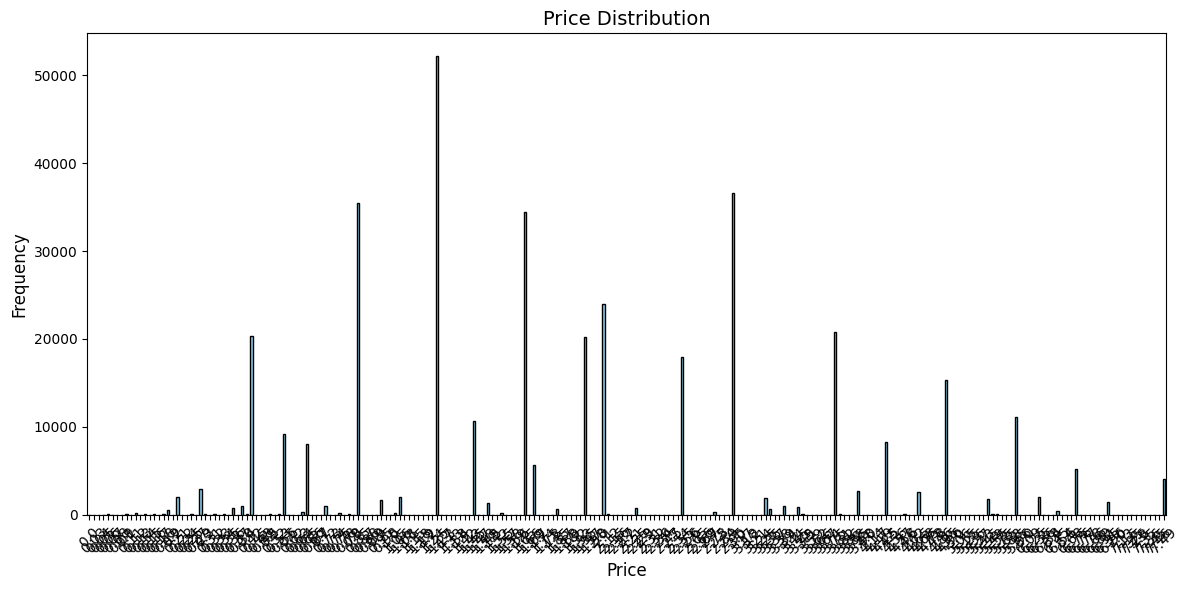

In [32]:
price_counts = df_core['Price'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Price Distribution', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# plt.savefig('date_bars.png')
plt.show()

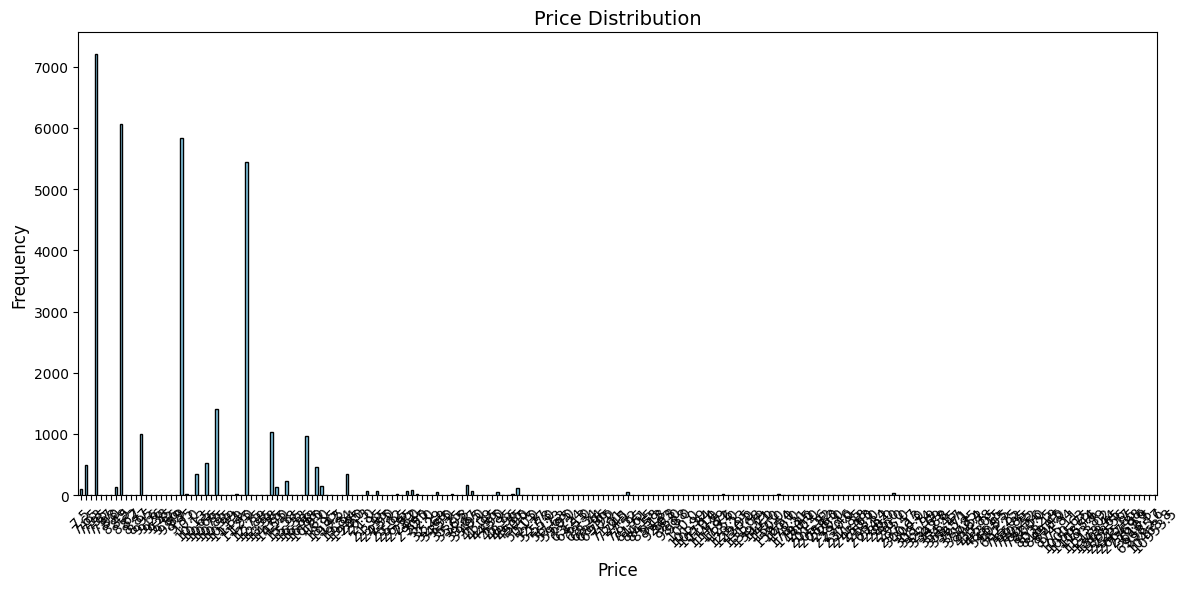

In [33]:
price_counts = df_premium['Price'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Price Distribution', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# plt.savefig('date_bars.png')
plt.show()

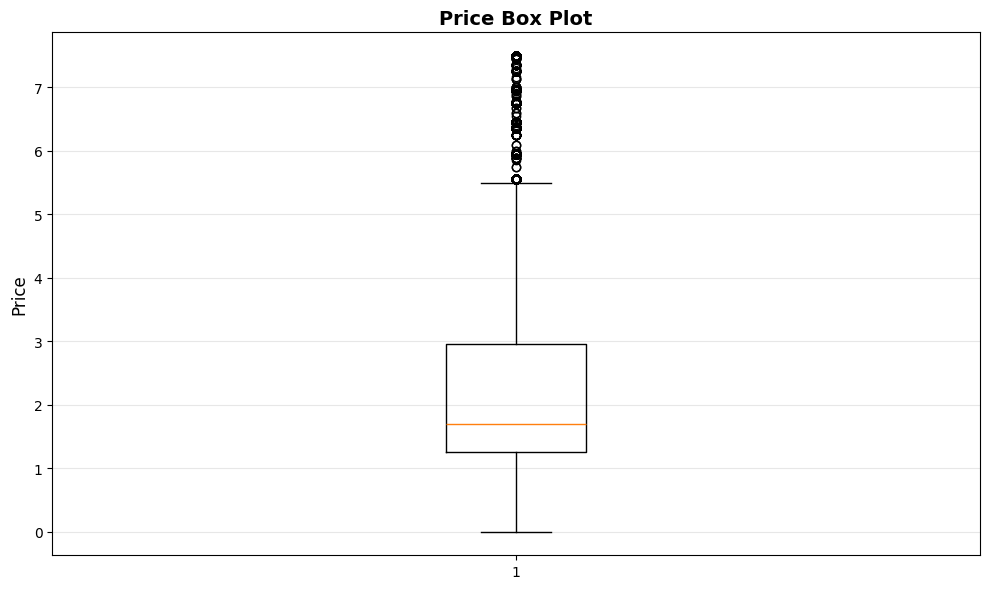

Price Statistics:
Min: $0.00
Q1: $1.25
Median: $1.69
Q3: $2.95
Max: $7.49
IQR: $1.70


In [34]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_core['Price'], vert=True)
plt.title('Price Box Plot', fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Price Statistics:")
print(f"Min: ${df_core['Price'].min():.2f}")
print(f"Q1: ${df_core['Price'].quantile(0.25):.2f}")
print(f"Median: ${df_core['Price'].median():.2f}")
print(f"Q3: ${df_core['Price'].quantile(0.75):.2f}")
print(f"Max: ${df_core['Price'].max():.2f}")
print(f"IQR: ${df_core['Price'].quantile(0.75) - df_core['Price'].quantile(0.25):.2f}")

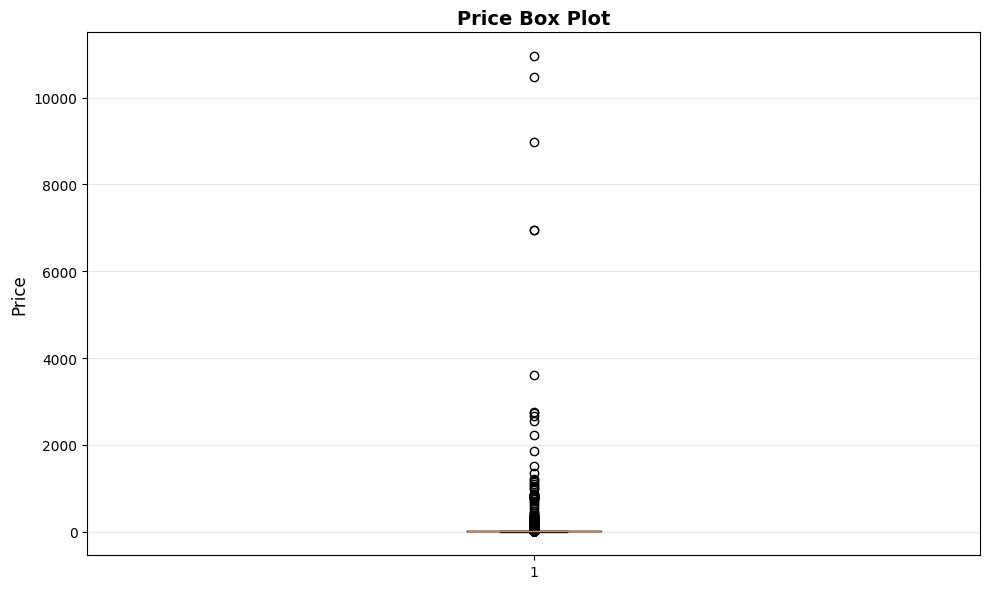

Price Statistics:
Min: $7.50
Q1: $8.50
Median: $9.95
Q3: $12.75
Max: $10953.50
IQR: $4.25


In [35]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_premium['Price'], vert=True)
plt.title('Price Box Plot', fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Price Statistics:")
print(f"Min: ${df_premium['Price'].min():.2f}")
print(f"Q1: ${df_premium['Price'].quantile(0.25):.2f}")
print(f"Median: ${df_premium['Price'].median():.2f}")
print(f"Q3: ${df_premium['Price'].quantile(0.75):.2f}")
print(f"Max: ${df_premium['Price'].max():.2f}")
print(f"IQR: ${df_premium['Price'].quantile(0.75) - df_premium['Price'].quantile(0.25):.2f}")

In [36]:
Q1_price = df['Price'].quantile(0.25)  # 25th percentile
Q3_price = df['Price'].quantile(0.75)  # 75th percentile
IQR_price = Q3_price - Q1_price
print("IQR:", IQR_price)
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

print(f"  0th percentile (Min):    ${df['Price'].min():.2f}")
print(f"  25th percentile (Q1):    ${Q1_price:.2f}  ← Bottom 25% of data is below this")
print(f"  50th percentile (Median):${df['Price'].median():.2f}")
print(f"  75th percentile (Q3):    ${Q3_price:.2f}  ← Bottom 75% of data is below this")
print(f"  100th percentile (Max):  ${df['Price'].max():.2f}")

print(f"\n🎯 THE IQR METHOD:")
print(f"  IQR (Interquartile Range) = Q3 - Q1")
print(f"  IQR = ${Q3_price:.2f} - ${Q1_price:.2f} = ${IQR_price:.2f}")
print(f"  → This is the range containing the MIDDLE 50% of your data")

print(f"\n⚠️  OUTLIER BOUNDS (using 1.5 × IQR rule):")
print(f"  Lower bound = Q1 - (1.5 × IQR)")
print(f"  Lower bound = ${Q1_price:.2f} - (1.5 × ${IQR_price:.2f})")
print(f"  Lower bound = ${lower_bound_price:.2f}")
print(f"\n  Upper bound = Q3 + (1.5 × IQR)")
print(f"  Upper bound = ${Q3_price:.2f} + (1.5 × ${IQR_price:.2f})")
print(f"  Upper bound = ${upper_bound_price:.2f}")

print(f"\n✅ NORMAL DATA (NOT OUTLIERS):")
print(f"  Any price between ${lower_bound_price:.2f} and ${upper_bound_price:.2f}")

IQR: 2.5
  0th percentile (Min):    $0.00
  25th percentile (Q1):    $1.25  ← Bottom 25% of data is below this
  50th percentile (Median):$1.95
  75th percentile (Q3):    $3.75  ← Bottom 75% of data is below this
  100th percentile (Max):  $10953.50

🎯 THE IQR METHOD:
  IQR (Interquartile Range) = Q3 - Q1
  IQR = $3.75 - $1.25 = $2.50
  → This is the range containing the MIDDLE 50% of your data

⚠️  OUTLIER BOUNDS (using 1.5 × IQR rule):
  Lower bound = Q1 - (1.5 × IQR)
  Lower bound = $1.25 - (1.5 × $2.50)
  Lower bound = $-2.50

  Upper bound = Q3 + (1.5 × IQR)
  Upper bound = $3.75 + (1.5 × $2.50)
  Upper bound = $7.50

✅ NORMAL DATA (NOT OUTLIERS):
  Any price between $-2.50 and $7.50


In [46]:
df_main = df[df['Price'] <= 7.50]
df_bulk = df[df['Price'] > 7.50]

In [47]:
print(df_main.describe())

            Quantity          Price    Customer ID
count  374706.000000  374706.000000  374706.000000
mean       14.502399       2.283145   15379.447852
std       100.937842       1.650208    1680.399637
min         1.000000       0.000000   12346.000000
25%         2.000000       1.250000   14006.000000
50%         6.000000       1.690000   15353.000000
75%        12.000000       2.950000   16823.000000
max     19152.000000       7.500000   18287.000000


In [48]:
print(df_bulk.describe())

           Quantity         Price   Customer ID
count  32989.000000  32989.000000  32989.000000
mean       3.185547     14.778128  15244.199430
std        7.745566    121.471732   1667.913551
min        1.000000      7.650000  12347.000000
25%        1.000000      8.500000  13881.000000
50%        2.000000      9.950000  15048.000000
75%        2.000000     12.750000  16713.000000
max      408.000000  10953.500000  18287.000000


In [42]:
Q1_quant = df['Quantity'].quantile(0.25)  # 25th percentile
Q3_quant = df['Quantity'].quantile(0.75)  # 75th percentile
IQR_quant = Q3_quant - Q1_quant
print("IQR:", IQR_quant)
lower_bound_quant = Q1_quant - 1.5 * IQR_quant
upper_bound_quant = Q3_quant + 1.5 * IQR_quant

print(f"  0th percentile (Min):    {df['Quantity'].min():.2f}")
print(f"  25th percentile (Q1):    {Q1_quant:.2f}  ← Bottom 25% of data is below this")
print(f"  50th percentile (Median):{df['Quantity'].median():.2f}")
print(f"  75th percentile (Q3):    {Q3_quant:.2f}  ← Bottom 75% of data is below this")
print(f"  100th percentile (Max):  {df['Quantity'].max():.2f}")

print(f"\n🎯 THE IQR METHOD:")
print(f"  IQR (Interquartile Range) = Q3 - Q1")
print(f"  IQR = {Q3_quant:.2f} - {Q1_quant:.2f} = {IQR_quant:.2f}")
print(f"  → This is the range containing the MIDDLE 50% of your data")

print(f"\n⚠️  OUTLIER BOUNDS (using 1.5 × IQR rule):")
print(f"  Lower bound = Q1 - (1.5 × IQR)")
print(f"  Lower bound = {Q1_quant:.2f} - (1.5 × {IQR_quant:.2f})")
print(f"  Lower bound = {lower_bound_quant:.2f}")
print(f"\n  Upper bound = Q3 + (1.5 × IQR)")
print(f"  Upper bound = {Q3_quant:.2f} + (1.5 × {IQR_quant:.2f})")
print(f"  Upper bound = {upper_bound_quant:.2f}")

print(f"\n✅ NORMAL DATA (NOT OUTLIERS):")
print(f"  Any quantity between {lower_bound_quant:.2f} and {upper_bound_quant:.2f}")

IQR: 10.0
  0th percentile (Min):    1.00
  25th percentile (Q1):    2.00  ← Bottom 25% of data is below this
  50th percentile (Median):5.00
  75th percentile (Q3):    12.00  ← Bottom 75% of data is below this
  100th percentile (Max):  19152.00

🎯 THE IQR METHOD:
  IQR (Interquartile Range) = Q3 - Q1
  IQR = 12.00 - 2.00 = 10.00
  → This is the range containing the MIDDLE 50% of your data

⚠️  OUTLIER BOUNDS (using 1.5 × IQR rule):
  Lower bound = Q1 - (1.5 × IQR)
  Lower bound = 2.00 - (1.5 × 10.00)
  Lower bound = -13.00

  Upper bound = Q3 + (1.5 × IQR)
  Upper bound = 12.00 + (1.5 × 10.00)
  Upper bound = 27.00

✅ NORMAL DATA (NOT OUTLIERS):
  Any quantity between -13.00 and 27.00


In [49]:
print(f"df_main: {len(df_main):,} ")
print(f"df_bulk: {len(df_bulk):,} ")

df_main: 374,706 
df_bulk: 32,989 


In [51]:
df_main = df_main[df_main['Quantity'] <= 27.00].copy()
df_bulk_quant = df_bulk[df_bulk['Quantity'] > 27.00].copy()

In [52]:
print(f"df_main: {len(df_main):,} ")
print(f"df_bulk: {len(df_bulk):,} ")
print(f"df_bulk_quant: {len(df_bulk_quant):,} ")

df_main: 348,642 
df_bulk: 32,989 
df_bulk_quant: 274 


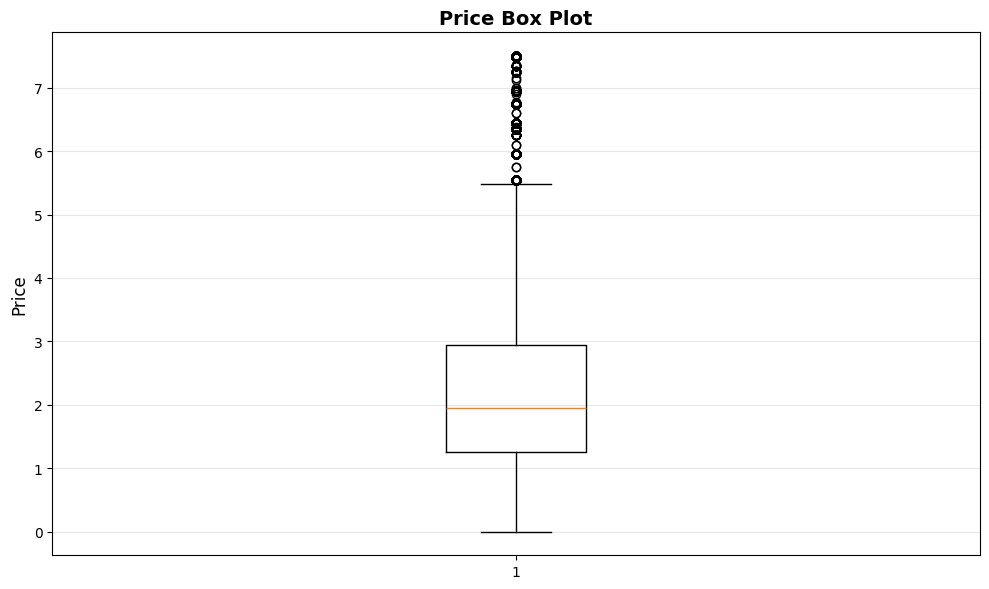

            Quantity          Price    Customer ID
count  348642.000000  348642.000000  348642.000000
mean        7.125630       2.355336   15397.055796
std         6.618247       1.661446    1677.599874
min         1.000000       0.000000   12346.000000
25%         2.000000       1.250000   14031.000000
50%         5.000000       1.950000   15394.000000
75%        12.000000       2.950000   16859.000000
max        27.000000       7.500000   18287.000000


In [53]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_main['Price'], vert=True)
plt.title('Price Box Plot', fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print(df_main.describe())

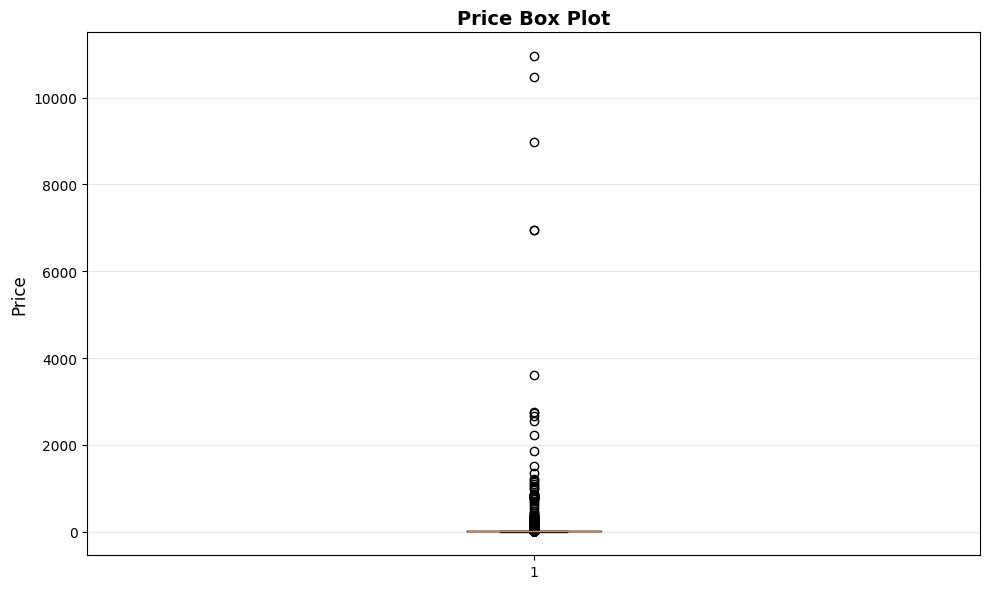

           Quantity         Price   Customer ID
count  32989.000000  32989.000000  32989.000000
mean       3.185547     14.778128  15244.199430
std        7.745566    121.471732   1667.913551
min        1.000000      7.650000  12347.000000
25%        1.000000      8.500000  13881.000000
50%        2.000000      9.950000  15048.000000
75%        2.000000     12.750000  16713.000000
max      408.000000  10953.500000  18287.000000


In [54]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_bulk['Price'], vert=True)
plt.title('Price Box Plot', fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print(df_bulk.describe())

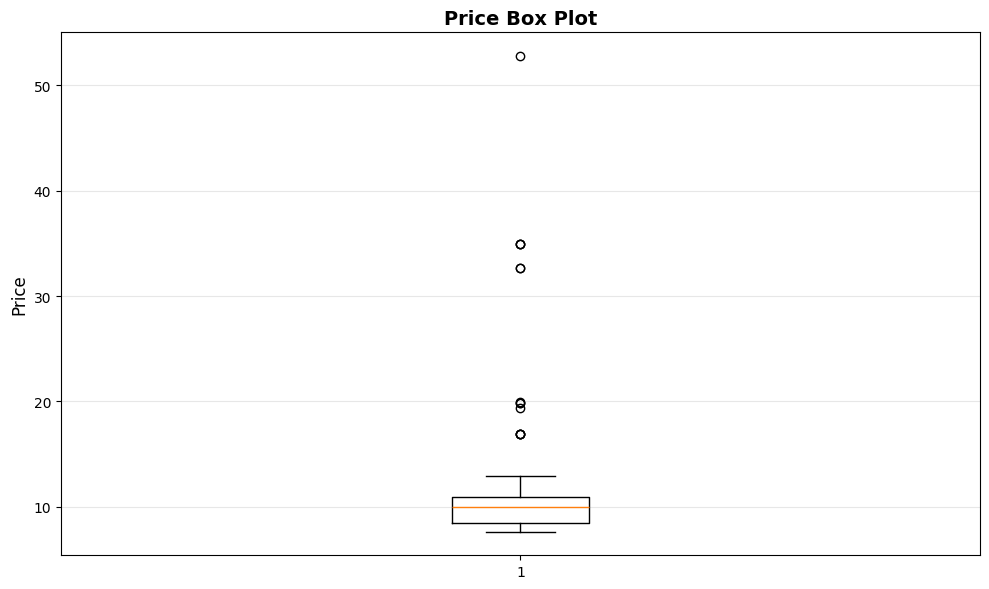

         Quantity       Price   Customer ID
count  274.000000  274.000000    274.000000
mean    63.989051   10.455036  15219.864964
std     48.850635    4.617643   1826.844969
min     28.000000    7.650000  12356.000000
25%     35.000000    8.500000  13799.000000
50%     48.000000    9.950000  14956.500000
75%     72.000000   10.950000  17380.000000
max    408.000000   52.780000  18102.000000


In [55]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_bulk_quant['Price'], vert=True)
plt.title('Price Box Plot', fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print(df_bulk_quant.describe())

In [56]:
df_main.head(5)

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Date,Time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01,07:45:00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,1.65,13085.0,United Kingdom,2009-12-01,07:45:00


In [57]:
df_main["line_revenue"] = df["Quantity"] * df["Price"]
df_main["order_datetime"] = pd.to_datetime(
    df_main["Date"].astype(str) + " " + df_main["Time"].astype(str)
)
df_main_ch = (
    df_main.groupby("Invoice")
      .agg(
          order_datetime=("order_datetime", "min"),
          customer_id=("Customer ID", "first"),
          country=("Country", "first"),
          order_revenue=("line_revenue", "sum"),
          item_count=("Quantity", "sum"),
          unique_products=("StockCode", "nunique")
      )
      .reset_index()
)
df_main_ch.head(5)

,Invoice,order_datetime,customer_id,country,order_revenue,item_count,unique_products
0,489434,2009-12-01 07:45:00,13085.0,United Kingdom,404.50,118,7
1,489435,2009-12-01 07:46:00,13085.0,United Kingdom,145.80,60,4
2,489436,2009-12-01 09:06:00,13078.0,United Kingdom,613.33,191,18
3,489437,2009-12-01 09:08:00,15362.0,United Kingdom,282.90,142,21
4,489439,2009-12-01 09:28:00,12682.0,France,356.40,214,17


In [58]:
dim_customers = (
    df_main_ch.groupby("customer_id")
           .agg(
               first_order_date=("order_datetime", "min"),
               total_orders=("Invoice", "count"),
               total_revenue=("order_revenue", "sum")
           )
           .reset_index()
)
print(dim_customers.head(5))

   customer_id    first_order_date  total_orders  total_revenue
0      12346.0 2009-12-14 08:34:00            11         372.86
1      12347.0 2010-10-31 14:20:00             2        1224.17
2      12348.0 2010-09-27 14:59:00             1         222.16
3      12349.0 2010-04-29 13:20:00             2        1635.89
4      12351.0 2010-11-29 15:23:00             1         288.18
